In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

We read in and clean the data by dropping any row that doesn't have scores for the columns

In [18]:
df = pd.read_csv('grades.csv')
df = df.dropna()
df.head(6)

,First Name,WA,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8
0,CAROLINE,660.0,5.0,5.0,20.0,0.0,0.0,5.0,5.0,10.0
1,HARRISON,604.0,5.0,3.0,20.0,1.0,0.0,5.0,5.0,10.0
2,KAITLYN,540.0,5.0,5.0,5.0,1.0,4.0,1.0,1.0,20.0
3,COURTNEY,670.0,5.0,1.0,5.0,3.0,5.0,5.0,3.0,10.0
4,DELANEY,202.0,5.0,5.0,4.0,0.0,4.0,5.0,3.0,1.0
5,MICHAEL,554.0,5.0,5.0,20.0,0.0,6.0,5.0,3.0,10.0


We can see the data's first column is called "First Name". The reamining columns have scores that account for the overall score of the student. We sum those scores and create a new column called 'RawAssignmentScore.' Then plot a histogram.

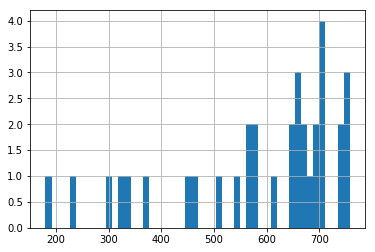

In [19]:
assignment_list=['WA','Q1','Q2','Q3','Q4','Q5','Q6','Q7','Q8']
df['RawAssignmentScore']=df[assignment_list].sum(axis=1)
df['RawAssignmentScore'].hist(bins=50)

From the histogram we can get rough estimates of how we should cluster students. Roughly, students with 750 or more should be clustered, 650-750 should be clustered and so on. Below we define a function to cluster students.

In [27]:
def calcGrade(D,L,col1,g,tol):
    
    #Inputs:
        #D is any dataframe
        #g is a list. The len(g) is equal to the number of clusters we want
        #L is a list of integer entries. The len(L)=len(g) and sum(L)=D.shape[0]
        #tol is a positive real value. It stands for tolerance, and is used to guarantee that the highest score
            #in one cluster is at least distance tol away from the lowest score in a higher cluster

    #Outputs:
        #D the dataset D with new column 'AssignmentLetter.' 
        #tl is a list of positive values with len(tl)=len(g)-1. The ith value of tl is equal to the difference of
        #the minimum score of the ith cluster and the maximum score of the (i+1)th cluster
        #c is a list of values with len(c)=len(g). It records the minimum score in the first len(g)-1 clusters.
        
    for i in range (1,len(lf)):
        lf[i]+=lf[i-1]
    D=D.sort_values(col1,ascending=False)
    count=0
    index=0
    Q=[]
    tl=[]
    c=[]
    for i in range (0,D.shape[0]):
        count+=1
        if count>L[index]:
            if (D[col1].values[count-2]-D[col1].values[count-1])<tol:
                L[index]+=1
                L[index+1]-=1
            else:
                c.append(D[col1].values[count-2])
                index+=1
                tl.append(D[col1].values[count-2]-D[col1].values[count-1])
        Q.append(g[index])
    temp=pd.Series(Q)
    D['AssignmentLetter']=temp.values
    return(D,tl,c)

The function calcGrade first orders D by the column 'col1.' It then clusters the first L[0] many rows of D by assigning a value g[0] to the new column 'AssignmentLetter.' Then calcGrade checks the next highest value in D, namely D[col1].values[count-2], to see whether or not that value should be in the first cluster. If (D[col1].values[count-2]-D[col1].values[count-1])<tol then D[col1].values[count-2] should be in the first cluster. We increase L[0] by 1 and decrease L[1] by 1 to illistrate that the sizes of the clusters have changed. This process continues untill (D[col1].values[count-2]-D[col1].values[count-1])<tol fails. At which, we move to the next cluster and repeat the same steps again.

For this particula dataset, we cluster values in 'RawAssignmentScore' into 8 clusters as seen in the list g below. The list lf is a reference for the number of students to be in a particular cluster.

In [61]:
g=['F','D','D+','C','C+','B','B+','A']
g=g[::-1]
lf=[4,5,6,6,5,4,3,1]

In [62]:
df1,toleranceList1,cutOffs1=calcGrade(df,lf,'RawAssignmentScore',g,4)
print(df1['AssignmentLetter'].value_counts())
print(toleranceList1)
print(cutOffs1)

B     9
C     7
A     5
D+    4
B+    3
D     3
C+    2
F     1
Name: AssignmentLetter, dtype: int64
[30.0, 6.0, 5.0, 40.0, 41.0, 8.0, 49.0]
[740.0, 707.0, 658.0, 648.0, 508.0, 338.0, 229.0]


Let's consider ordering toleranceList1

In [63]:
toleranceList1=sorted(toleranceList1)
print(toleranceList1)

[5.0, 6.0, 8.0, 30.0, 40.0, 41.0, 49.0]


We see the smallest value is toleranceList1 is 5. This tells us that if we change the tolerance tol from 4 to a number larger than 5, we will change size of clusters. We compute calcGrade with tol=6 and tol=20.

In [74]:
lf=[4,5,6,6,5,4,3,1]
df2,toleranceList2,cutOffs2=calcGrade(df,lf,'RawAssignmentScore',g,6)
print(df2['AssignmentLetter'].value_counts())
print(toleranceList2)
print(cutOffs2)

B     11
C      6
A      5
D+     4
B+     3
D      3
F      1
C+     1
Name: AssignmentLetter, dtype: int64
[30.0, 6.0, 40.0, 26.0, 41.0, 8.0, 49.0]
[740.0, 707.0, 648.0, 608.0, 508.0, 338.0, 229.0]


In [75]:
lf=[4,5,6,6,5,4,3,1]
df3,toleranceList3,cutOffs3=calcGrade(df,lf,'RawAssignmentScore',g,20)
print(df3['AssignmentLetter'].value_counts())
print(toleranceList3)
print(cutOffs3)

B+    14
D+     5
C+     5
A      5
F      2
C      1
B      1
D      1
Name: AssignmentLetter, dtype: int64
[30.0, 40.0, 26.0, 38.0, 41.0, 25.0, 76.0]
[740.0, 648.0, 608.0, 546.0, 508.0, 330.0, 305.0]


[740.0, 648.0, 608.0, 546.0, 508.0, 330.0, 305.0]

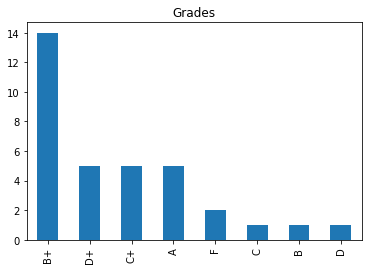

In [76]:
df=df3
cutOffs=cutOffs3
df['AssignmentLetter'].value_counts().plot(title='Grades', kind='bar')
cutOffs

By reading the cutOffs we have the range of scores for each cluster. 

A: [740,infinity) 

B+: [648,740) 

B: [608,648) 

C+: [546,608) 

C: [508,546) 

D+: [330,508) 

D: [305,330) 

F: [0,305)

From the earlier observation with the histogram we guessed the first two clusters to be [750,infinity) and [650,750). Our data reflects these estimates. 